In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt 
% matplotlib inline
from pandas.tools.plotting import lag_plot

In [11]:
from scipy import signal

In [12]:
d_t=pd.read_csv('GIR.csv', sep='\t')


In [13]:
%magic 

In [14]:
time=np.linspace(0,5, 100000)

In [15]:
s1=pd.Series(d_t.iloc[0:100000, 0:1].values.ravel(), index=time)
s2=pd.Series(d_t.iloc[0:100000, 5:6].values.ravel(), index=time)

C:\Users\Amalia\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


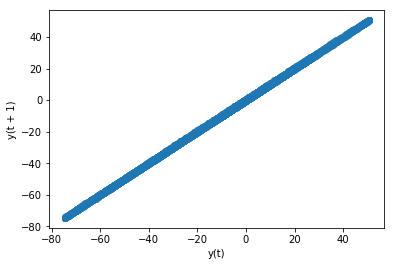

In [16]:
lag_plot(s2)
pyplot.show()

In [17]:
from pandas.plotting import autocorrelation_plot

In [23]:
corr=signal.correlate(s1, s2, mode='same')

C:\Users\Amalia\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
C:\Users\Amalia\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


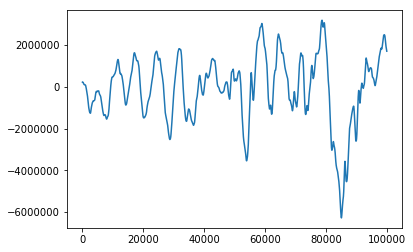

In [25]:
plt.plot(corr)

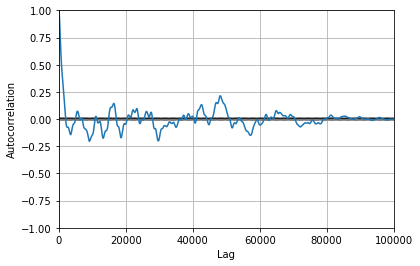

In [12]:
autocorrelation_plot(s1)

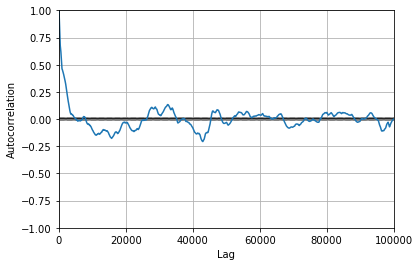

In [15]:
autocorrelation_plot(s2)

In [16]:
import statsmodels
            

In [28]:
from statsmodels.tsa.arima_model import ARMA

In [38]:
model=ARMA(s2, order=(1,0))
res=model.fit()

C:\Users\Amalia\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


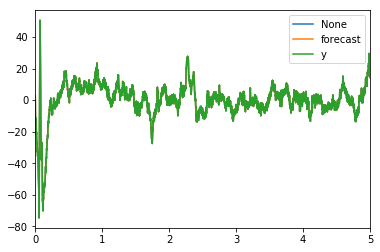

In [46]:
fig,ax=plt.subplots()
ax=s2.plot(ax=ax)
fig=res.plot_predict(ax=ax)

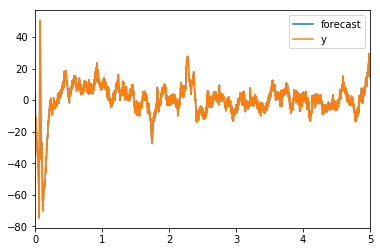

In [39]:
y=res.plot_predict()
plt.show()